<a href="https://colab.research.google.com/github/careneA/ai4all-official.github.io/blob/main/AI4ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preparation & Cleaning



In [1]:
from google.colab import drive
drive.mount('/content/drive')

# import path changing library
import os
import xarray as xr
os.chdir('/content/drive/MyDrive/AI4ALL/data')

import pandas as pd

# Load the four datasets
df_sp500 = pd.read_csv("sp500_headlines_2008_2024.csv")

df_sentiment = pd.read_csv("sentiment/all-data.csv", encoding='latin-1')

df_esg = pd.read_csv("company_esg_financial_dataset 2.csv")

# Display the first few rows of one DataFrame to confirm successful loading
print("--- Financial News Headlines Loaded ---")
print(df_sp500.head())


print("--- Sentiment Loaded ---")
print(df_sentiment.head())


print("--- Company ESG Financial Loaded ---")
print(df_esg.head())

Mounted at /content/drive
--- Financial News Headlines Loaded ---
                                               Title        Date       CP
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16
1  Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16
2                   2008 predictions for the S&P 500  2008-01-02  1447.16
3  U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16
4  U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18
--- Sentiment Loaded ---
    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                          

In [2]:
# ==========================================================
# INVESTHIC: Data Cleaning + EDA for ESG & Financial Datasets
# Optimized for Google Colab/Drive Environment
# ==========================================================

# Import libraries (already done in your setup, but included for completeness)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download("wordnet")


# NLTK setup (Necessary for lemmatization and stop words)
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore') # Suppress warnings

# Download NLTK resources if not already present
try:
    stopwords = nltk.corpus.stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stopwords = nltk.corpus.stopwords.words('english')

try:
    WordNetLemmatizer = nltk.stem.WordNetLemmatizer
except LookupError:
    nltk.download('wordnet')
    WordNetLemmatizer = nltk.stem.WordNetLemmatizer

# ----------------------------------------------------------
# Helper function to clean financial news text
# ----------------------------------------------------------
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords)

def clean_text(text):
    """Cleans and normalizes financial news headlines/sentences."""
    if pd.isna(text):
        return ""
    # Ensure text is string before operations
    text = str(text).lower()  # lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'\$[A-Za-z]+', '', text)     # remove stock tickers like $AAPL
    text = re.sub(r'[^a-z\s]', '', text)        # remove punctuation/numbers
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



--- 1. S&P 500 Financial News Cleaning & EDA ---
Initial Shape: (19127, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19127 entries, 0 to 19126
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   19127 non-null  object 
 1   Date    19127 non-null  object 
 2   CP      19127 non-null  float64
dtypes: float64(1), object(2)
memory usage: 448.4+ KB
None
Shape after removing duplicates: (18153, 3)

Descriptive Statistics for Headline Length:
count    18153.00000
mean         7.06291
std          2.55206
min          0.00000
25%          5.00000
50%          7.00000
75%          9.00000
max         20.00000
Name: headline_length, dtype: float64


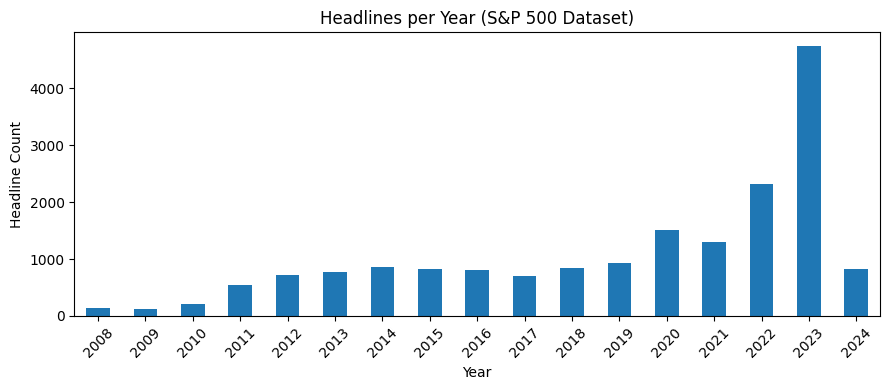

In [3]:
# ==========================================================
# 1️⃣ S&P 500 Financial News Headlines (df_sp500)
# ==========================================================
print("\n--- 1. S&P 500 Financial News Cleaning & EDA ---")

# Work on a copy
df_sp500_clean = df_sp500.copy()
print(f"Initial Shape: {df_sp500_clean.shape}")
print(df_sp500_clean.info())

# -------------------------------
# 🧹 Data Cleaning
# -------------------------------
df_sp500_clean.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df_sp500_clean.shape}")

# Rename columns for consistency
df_sp500_clean.rename(columns={
    "Title": "headline",
    "Date": "date",
    "CP": "closing_price"
}, inplace=True)

# Convert 'date' to datetime
df_sp500_clean["date"] = pd.to_datetime(df_sp500_clean["date"], errors="coerce")

# Clean text column
df_sp500_clean["clean_headline"] = df_sp500_clean["headline"].fillna("").apply(clean_text)

# Add headline length
df_sp500_clean["headline_length"] = df_sp500_clean["clean_headline"].str.split().str.len()

# -------------------------------
# 📊 Quick EDA
# -------------------------------
print("\nDescriptive Statistics for Headline Length:")
print(df_sp500_clean["headline_length"].describe())

# Trend plot — Headlines per Year
if "date" in df_sp500_clean.columns:
    df_sp500_clean["year"] = df_sp500_clean["date"].dt.year
    yearly_counts = df_sp500_clean["year"].dropna().value_counts().sort_index()

    plt.figure(figsize=(9, 4))
    yearly_counts.plot(kind="bar", title="Headlines per Year (S&P 500 Dataset)")
    plt.xlabel("Year")
    plt.ylabel("Headline Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# -------------------------------
# Optional save
# -------------------------------
df_sp500_clean.to_csv("clean_sp500_financial_news.csv", index=False)



--- 2. Sentiment Analysis Cleaning & EDA ---
Initial Shape: (4845, 2)
Renamed columns: ['sentiment', 'sentence']
Shape after removing duplicates/NaNs: (4839, 2)

Sentiment Class Counts:
sentiment
neutral     2872
positive    1363
negative     604
Name: count, dtype: int64

Neutral observations account for 59.35% of the data.


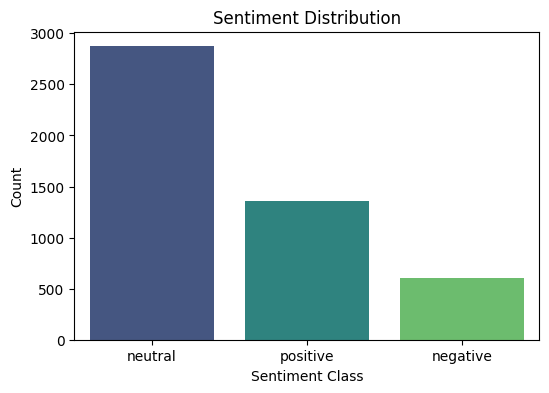

In [4]:
# ==========================================================
# 2️⃣ Sentiment Analysis for Financial News (df_sentiment)
# ==========================================================
print("\n--- 2. Sentiment Analysis Cleaning & EDA ---")

# Work on a copy
df_sentiment_clean = df_sentiment.copy()
print(f"Initial Shape: {df_sentiment_clean.shape}")

# -------------------------------
# 🧹 Data Cleaning
# -------------------------------
# Rename columns based on the observed data structure (assuming Col 0 is sentiment)
df_sentiment_clean.columns = ['sentiment', 'sentence'] + df_sentiment_clean.columns[2:].tolist()
print(f"Renamed columns: {df_sentiment_clean.columns.tolist()}")

df_sentiment_clean.drop_duplicates(inplace=True)
df_sentiment_clean.dropna(subset=['sentence'], inplace=True)
print(f"Shape after removing duplicates/NaNs: {df_sentiment_clean.shape}")

# Normalize and clean sentiment/sentence data
df_sentiment_clean['sentiment'] = df_sentiment_clean['sentiment'].astype(str).str.lower()
df_sentiment_clean['clean_sentence'] = df_sentiment_clean['sentence'].fillna("").apply(clean_text)

# -------------------------------
# 📊 Quick EDA
# -------------------------------
print("\nSentiment Class Counts:")
sentiment_counts = df_sentiment_clean['sentiment'].value_counts()
print(sentiment_counts)
print(f"\nNeutral observations account for {sentiment_counts.get('neutral', 0) / sentiment_counts.sum():.2%} of the data.")

# Visualization: Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_sentiment_clean, x='sentiment', palette='viridis', order=sentiment_counts.index)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()

# -------------------------------
# Optional save
# -------------------------------
df_sentiment_clean.to_csv("clean_financial_sentiment.csv", index=False)


--- 3. ESG & Financial Performance Cleaning & EDA ---
Initial Shape: (11000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  f

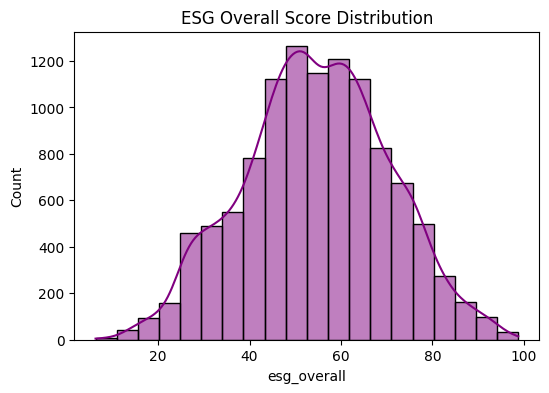

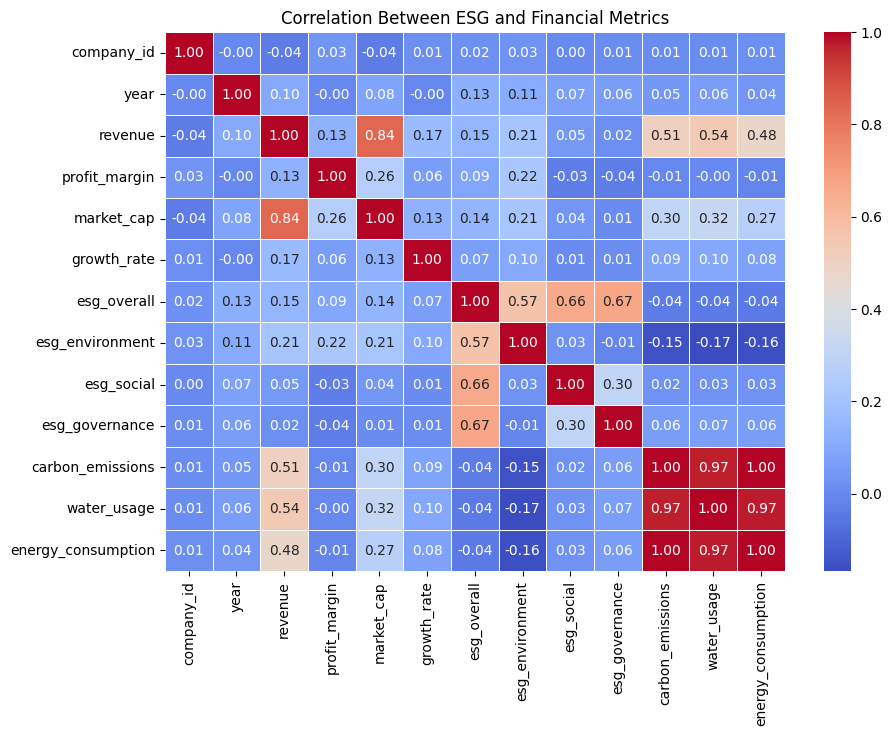


✅ Cleaning and EDA completed for all three datasets.
Columns in df_sp500_clean: Index(['headline', 'date', 'closing_price', 'clean_headline',
       'headline_length', 'year'],
      dtype='object')


In [5]:
# ==========================================================
# 3️⃣ ESG & Financial Performance Dataset (df_esg)
# ==========================================================
print("\n--- 3. ESG & Financial Performance Cleaning & EDA ---")

# Work on a copy
df_esg_clean = df_esg.copy()
print(f"Initial Shape: {df_esg_clean.shape}")
print(df_esg_clean.info())

# -------------------------------
# 🧹 Data Cleaning
# -------------------------------
df_esg_clean.drop_duplicates(inplace=True)
print("\nMissing Values per column after dropping duplicates:")
print(df_esg_clean.isna().sum())

# -------------------------------
# Rename columns for consistency
# -------------------------------
df_esg_clean.rename(columns={
    "CompanyID": "company_id",
    "CompanyName": "company_name",
    "Industry": "industry",
    "Region": "region",
    "Year": "year",
    "Revenue": "revenue",
    "ProfitMargin": "profit_margin",
    "MarketCap": "market_cap",
    "GrowthRate": "growth_rate",
    "ESG_Overall": "esg_overall",
    "ESG_Environmental": "esg_environment",
    "ESG_Social": "esg_social",
    "ESG_Governance": "esg_governance",
    "CarbonEmissions": "carbon_emissions",
    "WaterUsage": "water_usage",
    "EnergyConsumption": "energy_consumption"
}, inplace=True)

# -------------------------------
# 📊 Quick EDA
# -------------------------------
# Summary statistics for numeric metrics
print("\nSummary Statistics for Numeric Metrics:")
print(df_esg_clean.describe())

# ESG score distribution
if 'esg_overall' in df_esg_clean.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df_esg_clean['esg_overall'], bins=20, kde=True, color='purple')
    plt.title("ESG Overall Score Distribution")
    plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(10,7))
numeric_df = df_esg_clean.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Between ESG and Financial Metrics")
plt.show()

# -------------------------------
# Optional save
# -------------------------------
df_esg_clean.to_csv("clean_esg_financial_performance.csv", index=False)

print("\n✅ Cleaning and EDA completed for all three datasets.")

print("Columns in df_sp500_clean:", df_sp500_clean.columns)


# NLP Feature Engineering
**Goals**

Transform unstructured news headlines and sentences into quantitative signals you can feed into a supervised model.

Generate ethical/sentiment features reflecting ESG considerations.


**What this block does:**

*  Converts sentiment text → numeric scores and aggregates per company/date.

* Counts ESG-related keywords in headlines.

* Merges sentiment + ESG features into a single table.

* Computes rolling window aggregates to capture temporal context.

* Optionally adds TF-IDF embeddings for headline text.

* Saves df_features, ready for Step 3 (Bias Mitigation & Target Definition).

In [6]:
# ==========================================================
# Final Pipeline: Feature Engineering -> Optional Target -> Model
# STEP 1 — INSTALLS, IMPORTS, HELPER FUNCTIONS
# ==========================================================
print("=== Final pipeline start ===")

# Install required packages
!pip install -q rapidfuzz lightgbm

import pandas as pd
import numpy as np
import re
from rapidfuzz import process, fuzz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import lightgbm as lgb
import joblib
import warnings
warnings.filterwarnings('ignore')

# -----------------------------
# Helper functions
# -----------------------------
def safe_lower(x):
    return "" if pd.isna(x) else str(x).lower()

def keyword_count(text, keywords):
    text = safe_lower(text)
    return sum(text.count(word) for word in keywords)

def map_companies_literal(headlines_series, company_names):
    """Return array of mapped company or None using literal containment."""
    names_lower = [safe_lower(n) for n in company_names]
    mapped = []
    for txt in headlines_series:
        txt_l = safe_lower(txt)
        found = None
        for i, nm in enumerate(names_lower):
            if nm and nm in txt_l:
                found = company_names[i]
                break
        mapped.append(found)
    return mapped

def map_companies_fuzzy(headlines_series, company_names, scorer=fuzz.partial_ratio, score_cutoff=75):
    """Use rapidfuzz to fuzzy match headline -> company_name. Returns matched name or None."""
    choices = {safe_lower(n): n for n in company_names if pd.notna(n)}
    keys = list(choices.keys())
    mapped = []
    for txt in headlines_series:
        txt_l = safe_lower(txt)
        if not txt_l:
            mapped.append(None); continue
        best = process.extractOne(txt_l, keys, scorer=scorer)
        if best and best[1] >= score_cutoff:
            mapped.append(choices[best[0]])
        else:
            mapped.append(None)
    return mapped

print("Cell 1 complete.")


=== Final pipeline start ===
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.5 MB/s eta 0:00:00
Cell 1 complete.


In [7]:
# ==========================================================
# STEP 2 — PREPARE df_sp500_clean, df_sentiment_clean, df_esg_clean
# ==========================================================

print("df_sp500_clean columns:", df_sp500_clean.columns.tolist())
print("df_sentiment_clean columns:", df_sentiment_clean.columns.tolist())
print("df_esg_clean columns:", df_esg_clean.columns.tolist())

sp = df_sp500_clean.copy()
sent = df_sentiment_clean.copy()
esg = df_esg_clean.copy()

# Ensure date columns are datetime
for df_, col in [(sp, 'date'), (sent, 'date' if 'date' in sent.columns else None)]:
    if col and col in df_.columns:
        df_[col] = pd.to_datetime(df_[col], errors='coerce')

# Determine company identifier in ESG dataset
company_col = 'company_name' if 'company_name' in esg.columns else (
    'CompanyName' if 'CompanyName' in esg.columns else None
)
if company_col is None:
    raise ValueError("ESG dataset must contain company_name or CompanyName.")

company_names = esg[company_col].dropna().unique().tolist()

print("Cell 2 complete.")


df_sp500_clean columns: ['headline', 'date', 'closing_price', 'clean_headline', 'headline_length', 'year']
df_sentiment_clean columns: ['sentiment', 'sentence', 'clean_sentence']
df_esg_clean columns: ['company_id', 'company_name', 'industry', 'region', 'year', 'revenue', 'profit_margin', 'market_cap', 'growth_rate', 'esg_overall', 'esg_environment', 'esg_social', 'esg_governance', 'carbon_emissions', 'water_usage', 'energy_consumption']
Cell 2 complete.


NLP Feature Engineering (TF-IDF, keyword counts)

In [8]:
# ==========================================================
# STEP 3 — NLP Feature Engineering
# ==========================================================

print("\n-> Computing keyword counts and base headline features...")

esg_keywords = {
    'environment': ['sustainability','carbon','emission','climate','green'],
    'social': ['diversity','labor','employee','community','social'],
    'governance': ['governance','ethic','ethics','compliance','board','audit']
}

TEXT_COL = 'clean_headline' if 'clean_headline' in sp.columns else (
    'headline' if 'headline' in sp.columns else None
)

if TEXT_COL is None:
    raise ValueError("S&P dataset must contain clean_headline or headline.")

sp['clean_headline'] = sp[TEXT_COL].fillna("").astype(str)
sp['headline_length'] = sp['clean_headline'].str.split().str.len()

for k, kw in esg_keywords.items():
    sp[f'headline_{k}_count'] = sp['clean_headline'].apply(lambda t: keyword_count(t, kw))

print("-> Computing TF-IDF + SVD (50 comps)...")
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(sp['clean_headline'])

svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

for i in range(X_svd.shape[1]):
    sp[f'tfidf_{i}'] = X_svd[:, i]

print("Cell 3 complete.")



-> Computing keyword counts and base headline features...
-> Computing TF-IDF + SVD (50 comps)...
Cell 3 complete.


Company Mapping (Literal + Fuzzy)

In [9]:
# ==========================================================
# STEP 4 — Map headlines to companies
# ==========================================================

print("\n-> Mapping headlines to companies (literal then fuzzy)...")

mapped_literal = map_companies_literal(sp['clean_headline'], company_names)
sp['mapped_company'] = mapped_literal

unmapped_idx = sp[sp['mapped_company'].isna()].index
if len(unmapped_idx) > 0:
    print(f"Literal mapped {len(sp)-len(unmapped_idx)} of {len(sp)}. Running fuzzy...")
    fuzzy_matches = map_companies_fuzzy(
        sp.loc[unmapped_idx,'clean_headline'],
        company_names,
        score_cutoff=78
    )
    sp.loc[unmapped_idx, 'mapped_company'] = fuzzy_matches

mapped_rate = sp['mapped_company'].notna().mean()
print(f"Mapping coverage: {mapped_rate:.2%}")

if mapped_rate < 0.10:
    print("⚠ Low mapping (<10%). Falling back to date-level aggregation.")
    sp['mapped_company'] = np.nan

print("Cell 4 complete.")



-> Mapping headlines to companies (literal then fuzzy)...
Literal mapped 0 of 18153. Running fuzzy...
Mapping coverage: 0.76%
⚠ Low mapping (<10%). Falling back to date-level aggregation.
Cell 4 complete.


Aggregate Features (company/date or date-only)

In [10]:
# ==========================================================
# STEP 5 — Aggregate NLP features
# ==========================================================

print("\n-> Aggregating features...")

if sp['mapped_company'].notna().any():
    sp['agg_company'] = sp['mapped_company']
    agg_cols = (
        ['headline_length'] +
        [f'headline_{k}_count' for k in esg_keywords] +
        [f'tfidf_{i}' for i in range(50)]
    )

    sp['date'] = pd.to_datetime(sp['date'], errors='coerce')

    grouped = (
        sp.groupby(['agg_company','date'])[agg_cols]
        .mean()
        .reset_index()
        .rename(columns={'agg_company': 'company_name'})
    )

    # aggregate sentiment if possible
    if 'CompanyName' in sent.columns and 'date' in sent.columns:
        sent['date'] = pd.to_datetime(sent['date'], errors='coerce')
        sent_agg = (
            sent.groupby(['CompanyName','date'])['sentiment']
            .apply(lambda s: s.map({'positive':1,'neutral':0,'negative':-1}).mean())
            .reset_index()
            .rename(columns={'CompanyName':'company_name','sentiment':'sentiment_mean'})
        )
        grouped = grouped.merge(sent_agg, on=['company_name','date'], how='left')

    df_features = grouped.copy()
    group_level = 'company_date'

else:
    agg_cols = (
        ['headline_length'] +
        [f'headline_{k}_count' for k in esg_keywords] +
        [f'tfidf_{i}' for i in range(50)]
    )

    sp['date'] = pd.to_datetime(sp['date'], errors='coerce')
    df_features = sp.groupby('date')[agg_cols].mean().reset_index()
    group_level = 'date'

print(f"Aggregation level: {group_level}")
print("Cell 5 complete.")



-> Aggregating features...
Aggregation level: date
Cell 5 complete.


Merge with ESG Data (if company-level)

In [11]:
# ==========================================================
# STEP 6 — Merge NLP features with ESG dataset
# ==========================================================

if group_level == 'company_date':
    print("-> Merging with ESG static features.")
    esg_renamed = esg.rename(columns={company_col: 'company_name'})
    df_features = df_features.merge(esg_renamed, on='company_name', how='left')
    print("After ESG merge:", df_features.shape)
else:
    print("No company mapping → ESG merge skipped.")

print("Cell 6 complete.")


No company mapping → ESG merge skipped.
Cell 6 complete.


Target

In [12]:
# ==========================================================
# STEP 7 — Optional: Create supervised target
# ==========================================================

price_df_provided = False   # set to True after you load price_df

if price_df_provided:
    prices = price_df
    prices['date'] = pd.to_datetime(prices['date'])
    horizon = 21
    prices = prices.sort_values(['company_name','date'])
    prices['forward_return_21d'] = prices.groupby('company_name')['close'].transform(
        lambda x: x.shift(-horizon)/x - 1
    )

    df_features = df_features.merge(
        prices[['company_name','date','forward_return_21d']],
        on=['company_name','date'],
        how='left'
    )
    print("Target merged.")
else:
    print("Skipping target creation; supply price_df to enable modeling.")

print("Cell 7 complete.")


Skipping target creation; supply price_df to enable modeling.
Cell 7 complete.


Modeling or Save Features

In [13]:
# ==========================================================
# STEP 8 — Train model OR save feature table
# ==========================================================

if 'forward_return_21d' in df_features.columns and df_features['forward_return_21d'].notna().sum() > 200:
    print("\n-> Training LightGBM model...")

    df_model = df_features.dropna(subset=['forward_return_21d'])
    drop_cols = ['company_name','date'] if group_level=='company_date' else ['date']
    X = df_model.drop(columns=drop_cols + ['forward_return_21d'])
    X = X.select_dtypes(include=[np.number]).fillna(0)
    y = df_model['forward_return_21d']

    tscv = TimeSeriesSplit(n_splits=3)
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        print(f"Fold {fold+1}")
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        bst = lgb.train(
            {'objective':'regression','metric':'rmse','verbosity':-1,'seed':42},
            lgb.Dataset(X_train, label=y_train),
            num_boost_round=200
        )

        ypred = bst.predict(X_test)
        print("RMSE:", mean_squared_error(y_test, ypred, squared=False))
        print("R2:", r2_score(y_test, ypred))

    joblib.dump(bst, "investhic_lgbm_model.pkl")
    print("Model saved: investhic_lgbm_model.pkl")

else:
    print("No target → saving feature table.")
    df_features.to_csv("df_features_ready.csv", index=False)
    print("Saved df_features_ready.csv")

print("\n=== Pipeline complete ===")


No target → saving feature table.
Saved df_features_ready.csv

=== Pipeline complete ===


In [14]:
df = pd.read_csv("df_features_ready.csv")
df.head()

,date,headline_length,headline_environment_count,headline_social_count,headline_governance_count,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,...,tfidf_40,tfidf_41,tfidf_42,tfidf_43,tfidf_44,tfidf_45,tfidf_46,tfidf_47,tfidf_48,tfidf_49
0,2008-01-02,4.333333,0.0,0.0,0.0,0.046288,0.072533,0.040807,-0.010797,0.025168,...,-0.001242,0.028540,-0.016263,0.011712,-0.014816,0.028401,0.009899,0.014394,0.030588,0.007732
1,2008-01-03,7.000000,0.0,0.0,0.0,0.092271,0.002366,0.061431,0.041104,-0.027035,...,-0.029194,-0.064573,0.019924,-0.053861,0.034915,-0.011362,-0.066365,-0.071965,-0.009387,0.035883
2,2008-01-07,7.000000,0.0,0.0,0.0,0.078527,-0.003970,0.047123,0.013179,-0.022387,...,-0.003843,0.009365,-0.013143,-0.008541,0.000632,-0.003091,-0.018945,0.008503,0.003815,-0.012127
3,2008-01-09,7.000000,0.0,0.5,0.0,0.021732,0.008004,0.038563,-0.008501,-0.047208,...,0.058548,0.011462,0.012865,0.136520,-0.038638,0.049026,-0.014628,-0.007934,-0.012419,0.053203
4,2008-01-10,7.000000,0.0,0.0,0.0,0.100857,-0.011501,0.043731,0.022666,-0.039973,...,-0.053549,-0.027364,-0.018113,-0.037822,-0.031158,-0.030272,-0.018152,-0.002889,-0.050261,0.012209


In [15]:
!pip install gradio pandas numpy


In [16]:
import pandas as pd

df_esg = df_esg_clean.copy()     # or load from CSV
df_esg



,company_id,company_name,industry,region,year,revenue,profit_margin,market_cap,growth_rate,esg_overall,esg_environment,esg_social,esg_governance,carbon_emissions,water_usage,energy_consumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,1000,Company_1000,Consumer Goods,Latin America,2021,3419.2,21.7,14416.7,0.4,52.2,67.2,46.3,43.1,498875.8,623594.7,2494378.8
10996,1000,Company_1000,Consumer Goods,Latin America,2022,3518.8,21.4,8078.9,2.9,51.9,68.7,44.7,42.3,506013.7,632517.1,2530068.4
10997,1000,Company_1000,Consumer Goods,Latin America,2023,3417.1,17.1,13263.4,-2.9,52.9,72.4,43.1,43.2,473561.5,591951.9,2367807.7
10998,1000,Company_1000,Consumer Goods,Latin America,2024,3183.2,15.7,6960.1,-6.8,52.0,72.4,40.5,42.9,441310.9,551638.6,2206554.3


In [17]:
import numpy as np

df_esg['esg_score'] = np.random.uniform(3, 9, len(df_esg))  # temporary example


In [18]:
import gradio as gr
import pandas as pd
import joblib

# ---- ESG Function ----
def get_esg_score(company):
    if not company or company.strip() == "":
        return "Please enter a company name."

    # Strict exact match (case-insensitive)
    matches = df_esg[df_esg['company_name'].str.lower() == company.lower()]

    # Optional fallback: startswith
    if len(matches) == 0:
        matches = df_esg[df_esg['company_name'].str.lower().str.startswith(company.lower())]

    if len(matches) == 0:
        return "No matching company found."

    # Latest record
    found = matches.sort_values("year", ascending=False).iloc[0]
    score = round(found['esg_score'], 1)

    if score >= 7:
        note = "🌱 Highly Ethical"
    elif score >= 4:
        note = "⚠️ Mixed Ethical Signals"
    else:
        note = "❌ Low Ethical Performance"

    return f"**{found['company_name']}** → ESG Score: **{score}/10**\n\n{note}"


# ---- ROI Calculator Function ----
def calculate_roi(company, investment, monthly_deposit, duration_months):
    if not company or company.strip() == "":
        return "Please enter a company name."

    # Strict exact match
    matches = df_esg[df_esg["company_name"].str.lower() == company.lower()]

    # Optional fallback
    if len(matches) == 0:
        matches = df_esg[df_esg["company_name"].str.lower().str.startswith(company.lower())]

    if len(matches) == 0:
        return "No matching company found."

    # Latest company record
    row = matches.sort_values("year", ascending=False).iloc[0]

    # -----------------------------
    # Return Model Components
    # -----------------------------
    profit_margin = row["profit_margin"]            # %
    growth_rate = row["growth_rate"]                # %
    esg_score = row["esg_overall"]                  # 0–100

    # 1. financial fundamentals
    financial_return = (profit_margin * 0.4) + (growth_rate * 0.6)

    # 2. ESG risk adjustment
    risk_adjustment = (esg_score - 50) / 100   # can be positive or negative

    # 3. Final expected annual return
    annual_return = financial_return + risk_adjustment
    r = annual_return / 100

    # -----------------------------
    # Investment Calculations
    # -----------------------------
    T = duration_months / 12
    P = investment
    M = monthly_deposit

    if r == 0:
        future_value = P + (M * duration_months)
    else:
        fv_lump = P * ((1 + r) ** T)
        fv_monthly = M * (((1 + r/12) ** (duration_months) - 1) / (r/12))
        future_value = fv_lump + fv_monthly

    total_contributed = P + (M * duration_months)
    roi_percent = ((future_value - total_contributed) / total_contributed) * 100

    return f"""
**ROI Projection for {row['company_name']}**

### Return Model
- Profit Margin: **{profit_margin:.2f}%**
- Growth Rate: **{growth_rate:.2f}%**
- ESG Adjustment: **{risk_adjustment:.2f}%**
- **Estimated Annual Return:** **{annual_return:.2f}%**

---

### Investment Inputs
- Initial Investment: **${P:,.2f}**
- Monthly Deposit: **${M:,.2f}**
- Duration: **{duration_months} months** ({T:.2f} years)

---

### Future Value: **${future_value:,.2f}**
### Total ROI: **{roi_percent:.2f}%**

(Compared to total contributed: **${total_contributed:,.2f}**)
"""


# ---- Gradio UI ----
with gr.Blocks(title="INVESTHIC — Ethical + ROI Analysis") as ui:

    gr.Markdown("# 🌿 INVESTHIC — ESG Score + ROI Calculator")

    # ESG CHECKER
    with gr.Tab("ESG Score Checker"):
        company_esg = gr.Textbox(label="Enter Company Name")
        output_esg = gr.Markdown()
        gr.Button("Get ESG Score").click(get_esg_score, inputs=company_esg, outputs=output_esg)

    # ROI PREDICTION
    with gr.Tab("ROI Prediction"):
        company_input = gr.Textbox(label="Company Name")
        investment_input = gr.Number(label="Initial Investment ($)")
        monthly_deposit_input = gr.Number(label="Monthly Deposit ($)")
        duration_input = gr.Slider(1, 60, step=1, label="Duration (months)")

        roi_output = gr.Markdown()

        gr.Button("Calculate ROI").click(
            calculate_roi,
            inputs=[company_input, investment_input, monthly_deposit_input, duration_input],
            outputs=roi_output
        )

ui.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bb3e0cd0eef583a4d6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
